# Twitter API ideas :
    - Retireve tweets from 4 big retail players in indonesia & build wordcloud to see what they talking about (but not effective, as their tweets very 'conversational', hence tokenising it will destroy the tweet meaning entirely)
    - goodread reference : https://towardsdatascience.com/searching-for-tweets-with-python-f659144b225f

# Obtain
    - codes to retrieve twitter [here](https://github.com/twitterdev/Twitter-API-v2-sample-code)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import json
import requests
import os
from dotenv import load_dotenv

load_dotenv()

# get API token
BEARER_TOKEN = os.getenv('TWITTER_BEARER_TOKEN')


In [131]:
# from https://github.com/twitterdev/Twitter-API-v2-sample-code/blob/main/User-Tweet-Timeline/user_tweets.py

def create_url(user_id):
    # Replace with user ID below. get ID here https://tweeterid.com/
    # user_id = 33458236
    return "https://api.twitter.com/2/users/{}/tweets".format(user_id)


def get_params():
    # Tweet fields are adjustable.
    # Options include:
    # attachments, author_id, context_annotations,
    # conversation_id, created_at, entities, geo, id,
    # in_reply_to_user_id, lang, non_public_metrics, organic_metrics,
    # possibly_sensitive, promoted_metrics, public_metrics, referenced_tweets,
    # source, text, and withheld
    return {
        "tweet.fields": "in_reply_to_user_id"
        # , "max_results": 100
    }


def bearer_oauth(r):
    """
    Method required by bearer token authentication.
    """

    r.headers["Authorization"] = f"Bearer {BEARER_TOKEN}"
    r.headers["User-Agent"] = "v2UserTweetsPython"
    return r


def connect_to_endpoint(url, params):
    response = requests.request("GET", url, auth=bearer_oauth, params=params)
    print(response.status_code)
    if response.status_code != 200:
        raise Exception(
            "Request returned an error: {} {}".format(
                response.status_code, response.text
            )
        )
    return response.json()


# 33458236 @aceindonesia
# 2983890506 @ShopeeID
# 233845842 @Transmart_IND
# 72293042 @tokopedia


def main():
    user_id_list = [33458236, 2983890506, 233845842, 72293042]
    raw_tweets = []
    for user in user_id_list:
        url = create_url(user)
        params = get_params()
        json_response = connect_to_endpoint(url, params)
        
        # store raw tweets into list
        raw_tweets.extend(json_response['data'])

    return raw_tweets

    


raw_tweets = main()
print(f"{len(raw_tweets)} tweets succesfully loaded")

200
200
200
200
40 tweets succesfully loaded


In [143]:
tw_removed_replies = []

# # remove tweets that are replies
# for tweet in raw_tweets:
#     try:
#         tweet['in_reply_to_user_id']
#     except KeyError:
#         tw_removed_replies.append(tweet['text'])

# print(f"after cleaning, {len(tw_removed_replies)} tweets remains")


# OR keep replies


for tweet in raw_tweets:
    tw_removed_replies.append(tweet['text'])


In [144]:
# combine all tweets into one long sentence

i = 0
while i < len(tw_removed_replies):
    if i == 0:
        comb_tweets = tw_removed_replies[i]
        i += 1
    else:
        comb_tweets = comb_tweets + ' ' + tw_removed_replies[i]
        i += 1

# Scrub
    - remove punctuations
    - remove stopwords

In [145]:
# list of punctuations u want to remove
punc = '''\n!()-[]{};:'"\, <>./?@#$%^&*_~\râ\x80\x9d\x9c\x99\x94'''

# remove punctuation by looping thru each character in the text, and replace punc with space ' '
for char in comb_tweets:
    if char in punc:
        comb_tweets = comb_tweets.replace(char, ' ')

# set all to lowercase
comb_tweets = comb_tweets.lower()


aces menyambut hari kemerdekaan indonesia  dapatkan beragam kebutuhan anda dengan diskon hingga 70  di ace online melalui aplikasi miss ace  jangan sampai kehabisan ya aces  cek promonya di https   t co wwylbntzuk 🙂  acesemangataktivitassetiaphari  bisabersamaace  merdeka https   t co cow1z8lxxw hai kak  rlsptr  untuk kris air purifier potrtable di rp 999 900  untuk pemesanan dapat melalui ace online kami  terima kasih akhir pekan waktunya aces beristirahat dan bersantai di rumah  tentunya jangan lupa untuk menggunakan produk yang membuat kamar anda lebih sehat dan bersih dari ace  🙂 acesemangataktivitassetiaphari  bisabersamaace  seprai  pengharumruangan  airpurifier  pengisapdebu https   t co 8z6gnxb6z6 hai kak  luxlukman  mohon maaf atas kendala yang terjadi  mohon dapat di informasikan untuk no whatsapp kakak melalui dm kami agar dapat kami tindaklanjuti ke team terkait  terima kasih aces merawat hewan peliharaan sangat penting untuk memperhatikan segala kebutuhannya  untuk itu ace

In [146]:
# tokenize word (split whole sentence to each letter) by space ' '
tokens = comb_tweets.split(' ')

# bring in pre-made list of stopwords
sw_url = 'https://raw.githubusercontent.com/dwihdyn/ds-exploration/main/p3/data/stopwords-indo.txt'
response = requests.get(sw_url)
stopwords = response.text.splitlines()

# remove stopwords using loop
tokens = [t for t in tokens if t not in stopwords and len(t) > 0]


[('co', 28), ('https', 27), ('t', 27), ('kak', 20), ('dm', 12), ('selamat', 12), ('ace', 7), ('cek', 7), ('hai', 7), ('belanja', 7), ('tunggu', 7), ('produk', 6), ('mimin', 6), ('minto', 6), ('yaaa', 6), ('aces', 5), ('ya', 5), ('terima', 5), ('kasih', 5), ('rumah', 5), ('mohon', 5), ('x8qhueqyti', 5), ('kebutuhan', 4), ('🙂', 4), ('acesemangataktivitassetiaphari', 4), ('bisabersamaace', 4), ('maaf', 4), ('kakak', 4), ('klik', 4), ('langsung', 4), ('keluargatransmart', 4), ('online', 3), ('merdeka', 3), ('lupa', 3), ('kendala', 3), ('no', 3), ('whatsapp', 3), ('tindaklanjuti', 3), ('team', 3), ('terkait', 3), ('hewan', 3), ('mudah', 3), ('bantu', 3), ('tenang', 3), ('yah', 3), ('yaa', 3), ('eb', 3), ('moga', 3), ('xz', 3), ('yg', 3)]


# Explore
    - quick overview on what are the most words that we have after the cleaning

In [ ]:
# overview ot remaining data
from collections import Counter
print(Counter(tokens).most_common(50))

In [147]:
# additional stopwords to further clean
add_stopwords = ['mohon', 'hai', 'kak', 'ya', 'terima', 'kasih', 'rp', 'https', 't', 'co']
tokens = [t for t in tokens if t not in add_stopwords and len(t) > 0]


print(Counter(tokens).most_common(50))

[('dm', 12), ('selamat', 12), ('ace', 7), ('cek', 7), ('belanja', 7), ('tunggu', 7), ('produk', 6), ('mimin', 6), ('minto', 6), ('yaaa', 6), ('aces', 5), ('rumah', 5), ('x8qhueqyti', 5), ('kebutuhan', 4), ('🙂', 4), ('acesemangataktivitassetiaphari', 4), ('bisabersamaace', 4), ('maaf', 4), ('kakak', 4), ('klik', 4), ('langsung', 4), ('keluargatransmart', 4), ('online', 3), ('merdeka', 3), ('lupa', 3), ('kendala', 3), ('no', 3), ('whatsapp', 3), ('tindaklanjuti', 3), ('team', 3), ('terkait', 3), ('hewan', 3), ('mudah', 3), ('bantu', 3), ('tenang', 3), ('yah', 3), ('yaa', 3), ('eb', 3), ('moga', 3), ('xz', 3), ('yg', 3), ('hemat', 3), ('pilihan', 3), ('transmartindonesia', 3), ('aja', 3), ('memenangkan', 3), ('menyambut', 2), ('dapatkan', 2), ('aplikasi', 2), ('sehat', 2)]


# Model
    - Simple wordcloud

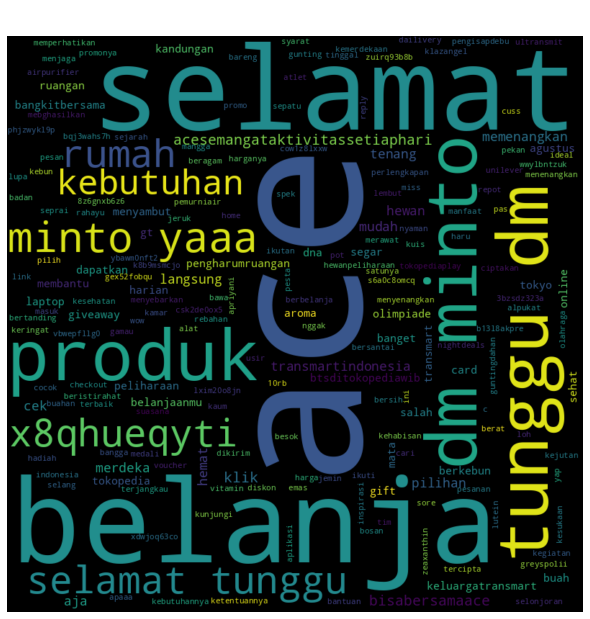

In [139]:
df = pd.DataFrame()

# append list to dataframe
df['tweets'] = tokens

# wordcloud function

from wordcloud import WordCloud

# function to create wordcloud
def wordcloud_generator(data, title=None):
    ''' Input review/description/long text column from dataset, Output wordcloud '''

    # enter data into wordcloud & pre-set the size of plot
    wordcloud = WordCloud(
            width=800,
            height=800,
            background_color='black',
            min_font_size=10
        ).generate(" ".join(data.values))

    # set the plt 'canvas' and plot wordcloud on it
    plt.figure(figsize=(8,8), facecolor=None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(title, fontsize=30)
    plt.show()  


wordcloud_generator(df['tweets'], title="Most used word in retail tweets")  

iNterpret :
- it's true, all of the words left has meaning only if its set in complete sentences.
- i had the idea of "listen to your customers" to change entirely where user can type in product name, output all tweets about the products. (but issue is too 'noisy' as in, we search 'tupperware' on twitter, and will return jokes that uses the word tupperware & nothing on the tupperware product itself)

tldr : we tried to take all of our competitor tweets to know what are they talking about. tried using wordcloud method, but its just too many stopwords, hence no value can be extracted from here. message me on linkeidn if you think ive missed anything

its sunday morning as i am writing this, so i thought what you be better spend on than to explore some funky ideas we can explore

initially here what i am trying to achieve is to 'snoop' what competitor are doing, by taking their tweets using twitter API, and create wordcloud to know what they talk about.

of course, we will be using OSEMN. so, let's begin

obtain:
we got the data from twitter API. need to get the token first here (https://developer.twitter.com/en/docs/authentication/oauth-2-0/bearer-tokens#:~:text=Login%20to%20your%20Twitter%20account,Generate%22%20next%20to%20Bearer%20Token.), and get code that you need here (https://github.com/twitterdev/Twitter-API-v2-sample-code) . here, we will be analysing few biggest retail players in indonesia. Ace, shopee, tokopedia, transmart

scrub :
remove any punctuations & stopwords that adds no value towards the tweet. indonesian stopword can be found here (https://github.com/dwihdyn/ds-exploration/blob/main/p3/data/stopwords-indo.txt). and finally tokenise the tweets. 

explore :
have a quick overview on what's the data remains using quick wordcount. we noticed that most of remains are stopwords that makes a meaning only if its a sentence

model :
out of curiousity, we still proceed to see wordcloud by using function 'wordcloud_generator' we created

iNterpret :
- it's true, all of the words left has meaning only if its set in complete sentences.
- i had the idea of "listen to your customers" to change entirely where user can type in product name, output all tweets about the products. (but issue is too 'noisy' as in, we search 'tupperware' on twitter, and will return jokes that uses the word tupperware & nothing on the tupperware product itself)



Final Words from Dwi
You can find the codes here https://github.com/dwihdyn/ds-exploration/blob/main/p3/d24a-twitter-api.ipynb
Perhaps we can improve this by getting sentiment scores instead & rank them by sentiment from bad to good (to know competitor weakness ?). Stay tuned for second episode (jeng jeng jenggg)